In [1]:
from naip_cnn import augment
from naip_cnn.data import NAIPDatasetWrapper
import matplotlib.pyplot as plt
import tensorflow as tf

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [5]:
DATASET_NAME = "MAL2016_CanyonCreek-1-30-30x30-30"
wrapper = NAIPDatasetWrapper.from_filename(DATASET_NAME)
train = wrapper.load_train(label="cover", augmenter=None)

In [6]:
imgs, labels = tuple(zip(*train.take(12)))

In [2]:
aug = augment.Augment(
    # augment.RandomFlip(),
    augment.RandomContrast(),
    augment.RandomBrightness(),
)
aug.to_json()

{'RandomContrast': {'max_delta': 1.5, 'min_delta': 0.5},
 'RandomBrightness': {'max_factor': 0.2, 'min_factor': -0.2}}

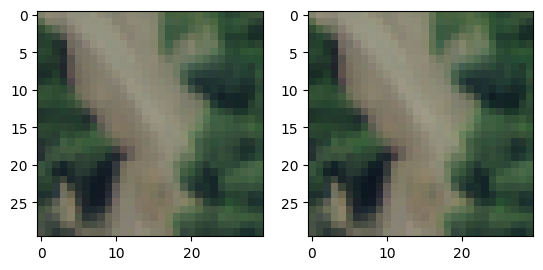

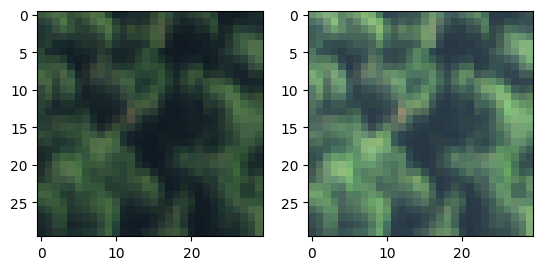

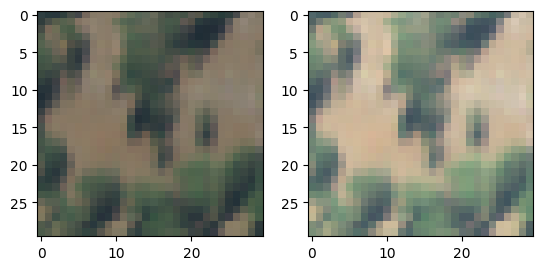

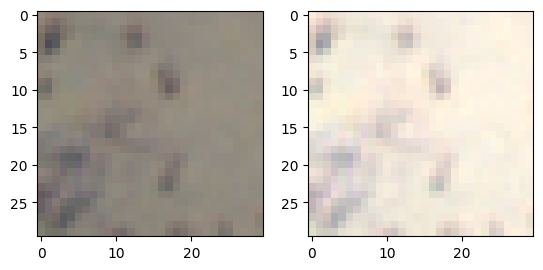

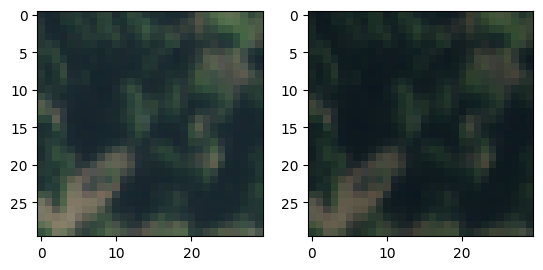

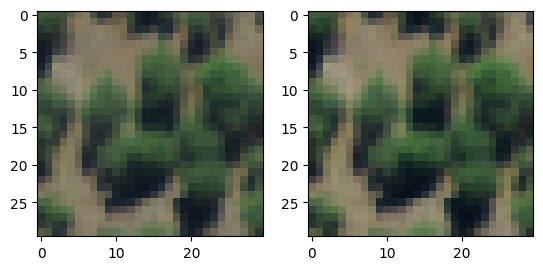

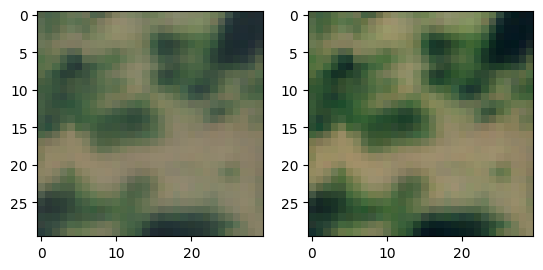

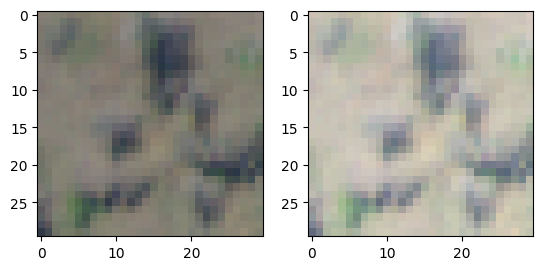

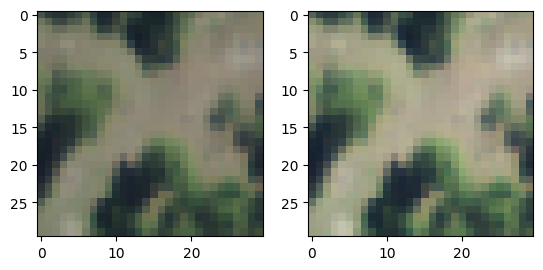

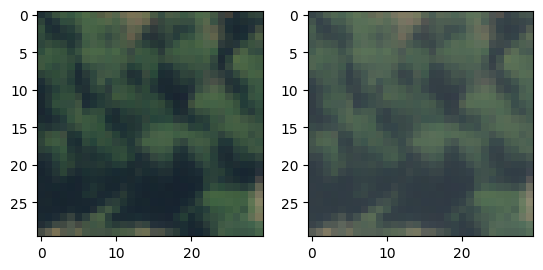

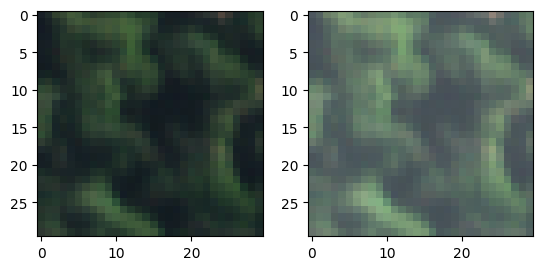

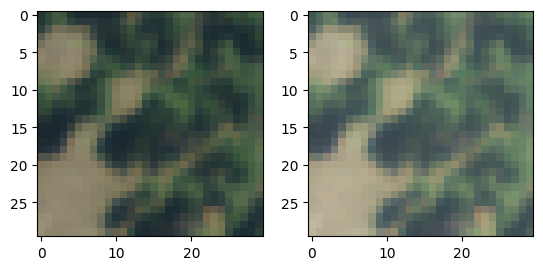

In [36]:
# Display original and augmented images side-by-side
for img in imgs:
    img_aug, _ = aug(img, labels[0])

    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img[..., :3])
    ax[1].imshow(img_aug[..., :3])
    plt.show()